# Загружаем пакеты

In [9]:
# загрузка пакетов: инструменты --------------------------------------------
# работа с массивами
import numpy as np
# фреймы данных
import pandas as pd
# графики
import matplotlib as mpl
# стили и шаблоны графиков на основе matplotlib
import seaborn as sns
# загрузка файлов по URL
import urllib
# проверка существования файла на диске
from pathlib import Path
# для форматирования результатов с помощью Markdown
from IPython.display import Markdown, display
# перекодировка категориальных переменных
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# хи-квадрат тест на независимость по таблице сопряжённости
from scipy.stats import chi2_contingency
# для таймера
import time
# загрузка пакетов: данные -------------------------------------------------
from sklearn import datasets
# загрузка пакетов: модели -------------------------------------------------
# дерево классификации
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# перекрёстная проверка и метод проверочной выборки
from sklearn.model_selection import cross_val_score, train_test_split
# для перекрёстной проверки и сеточного поиска
from sklearn.model_selection import KFold, GridSearchCV
# бэггинг
from sklearn.ensemble import BaggingClassifier
# случайный лес
from sklearn.ensemble import RandomForestClassifier
# бустинг
from sklearn.ensemble import GradientBoostingClassifier
# сводка по точности классификации
from sklearn.metrics import classification_report
# константы
# ядро для генератора случайных чисел
my_seed = 9212
# создаём псевдоним для короткого обращения к графикам
plt = mpl.pyplot
# настройка стиля и отображения графиков
# примеры стилей и шаблонов графиков:
# http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
sns.set_palette("Set2")
# раскомментируйте следующую строку, чтобы посмотреть палитру
# sns.color_palette("Set2")
# функция форматирования результатов с использованием Markdown
def printmd(string):
 display(Markdown(string))

# функции для попарной конкатенации элементов двух списков
concat_func_md = lambda x, y: '`' + str(x) + "`:&ensp;&ensp;&ensp;&ensp;" + str(y)
concat_func = lambda x, y: str(x) + ' ' * 4 + str(y)
# функция, которая строит график важности признаков в модели случайного леса
# источник: https://www.analyseup.com/learn-python-for-data-science/python-rand
def plot_feature_importance(importance, names, model_type) :
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,
                      inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Важность признаков в модели: ' + model_type)
    plt.xlabel('Важность признака')
    plt.ylabel('')

# Загружаем данные

In [14]:
# загружаем таблицу
url = "https://raw.githubusercontent.com/aksyuk/MTML/main/Labs/data/winequality-red_for_lab.csv"
DF = pd.read_csv(url)
# оставим в таблице только указанные переменные
DF_raw = DF.filter(items=['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol', 'Y'])
# выясняем размерность фрейма
print('Число строк и столбцов в наборе данных:\n', DF_raw.shape)

Число строк и столбцов в наборе данных:
 (1599, 10)


In [15]:
# типы столбцов
DF_raw.dtypes

fixed_acidity           float64
volatile_acidity        float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
pH                      float64
sulphates               float64
alcohol                 float64
Y                         int64
dtype: object

Отложим 15% наблюдений для прогноза

In [17]:
# наблюдения для моделирования
DF = DF_raw.sample(frac=0.85, random_state=my_seed)
# отложенные наблюдения
DF_predict = DF_raw.drop(DF.index)

# Предварительный анализ данных

## Описательные статистики

In [19]:
# считаем частоты по столбцам, учитывая пропуски
for col in DF.columns:
 freq_col = DF[col].value_counts(dropna=False)
 str_freqs = np.around(freq_col / sum(freq_col), 3).astype(str)
 str_names = freq_col.index.values.astype(str)
 # для вывода в html
 # printmd('**' + col + '**</br>' +
 # '</br>'.join(list(map(concat_func_md, str_names, str_freqs))))
 # для сохранения в pdf
 print('\n', col, '\n',
 '\n'.join(list(map(concat_func, str_names, str_freqs))))


 fixed_acidity 
 7.2    0.043
7.1    0.036
7.8    0.034
7.5    0.032
8.2    0.029
7.6    0.029
7.0    0.029
6.8    0.029
7.9    0.029
7.7    0.028
7.4    0.027
8.3    0.026
7.3    0.026
8.0    0.025
8.8    0.024
6.6    0.022
8.9    0.022
6.9    0.021
9.0    0.018
6.7    0.018
8.1    0.018
9.9    0.017
8.4    0.017
8.6    0.016
8.7    0.016
9.1    0.015
6.4    0.015
9.3    0.015
10.0    0.014
6.5    0.013
6.2    0.012
6.1    0.012
10.4    0.012
10.2    0.011
8.5    0.011
9.6    0.011
9.4    0.01
9.2    0.01
9.8    0.01
10.6    0.01
6.3    0.01
11.5    0.009
6.0    0.008
9.5    0.008
11.9    0.008
10.3    0.007
5.6    0.007
11.6    0.007
10.5    0.007
10.8    0.006
5.9    0.006
9.7    0.006
10.7    0.005
12.0    0.005
10.9    0.004
5.0    0.004
10.1    0.004
11.1    0.004
11.4    0.004
12.3    0.004
11.3    0.004
5.2    0.004
12.5    0.004
11.2    0.003
5.4    0.003
12.7    0.003
12.2    0.003
12.4    0.003
12.6    0.003
12.8    0.003
13.2    0.002
13.0    0.002
5.1    0.002
11.8    0.0

In [20]:
str_freqs.astype(str)

Y
1    0.532
0    0.468
Name: count, dtype: object

In [22]:
# проверяем пропуски
DF.isna().sum()
# пропусков не обнаружено

fixed_acidity           0
volatile_acidity        0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
pH                      0
sulphates               0
alcohol                 0
Y                       0
dtype: int64

# Модель дерева

Построим дерево классификации с обрезкой ветвей

In [26]:
# выращиваем дерево на всех объясняющих
X = DF.drop(['Y'], axis=1)
y = DF['Y']
# классификатор
cls_one_tree = DecisionTreeClassifier(criterion='entropy',
 random_state=my_seed)
tree_full = cls_one_tree.fit(X, y)
# выводим количество листьев (количество узлов)
tree_full.get_n_leaves()

224

In [27]:
# глубина дерева: количество узлов от корня до листа
# в самой длинной ветви
tree_full.get_depth()

17

Очевидно, дерево получилось слишком большое для отображения в текстовом формате.
Графическая визуализация тоже не поможет в данном случае. Посчитаем показатели точности
с перекрёстной проверкой.

In [28]:
# будем сохранять точность моделей в один массив:
score = list()
score_models = list()
# считаем точность с перекрёстной проверкой, показатель Acc
cv = cross_val_score(estimator=cls_one_tree, X=X, y=y, cv=5,
 scoring='accuracy')
# записываем точность
score.append(np.around(np.mean(cv), 3))
score_models.append('one_tree')
print('Acc с перекрёстной проверкой',
 '\nдля модели', score_models[0], ':', score[0])

Acc с перекрёстной проверкой 
для модели one_tree : 0.731


## Дерево с обрезкой ветвей

Подберём оптимальное количество ветвей, которое максимизирует ACC, для экономии
времени рассчитанный методом проверочной выборки.

In [33]:
# рассчитываем параметры alpha для эффективных вариантов обрезки ветвей
path = cls_one_tree.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print('Всего значений alpha:', len(ccp_alphas))
print('Энтропия листьев для первых 4 значений alpha:', impurities[1:5])

Всего значений alpha: 130
Энтропия листьев для первых 4 значений alpha: [0.00147167 0.00294334 0.00441501 0.00588668]


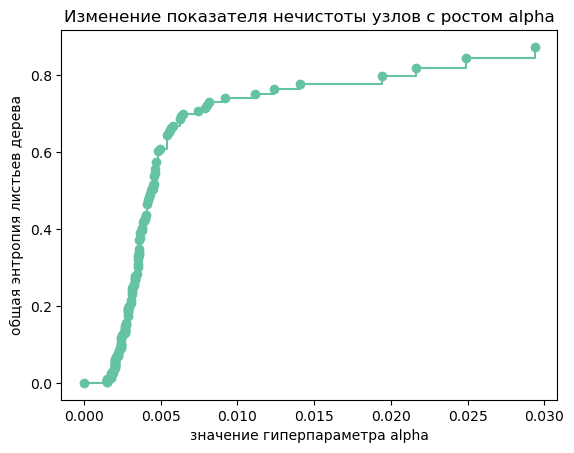

In [34]:
# изображаем на графике
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("значение гиперпараметра alpha")
plt.ylabel("общая энтропия листьев дерева")
plt.title("Изменение показателя нечистоты узлов с ростом alpha")
plt.show()

In [37]:
# обучающая и тестовая выборки, чтобы сэкономить время
X_train, X_test, y_train, y_test = train_test_split(X, y,
 random_state=my_seed)
# модели
clfs = list()
# таймер
tic = time.perf_counter()
# цикл по значениям alpha
for ccp_alpha in ccp_alphas:
 clf = DecisionTreeClassifier(random_state=my_seed, ccp_alpha=ccp_alpha)
 clf.fit(X_train, y_train)
 clfs.append(clf)
# таймер
toc = time.perf_counter()
print(f"Расчёты по обрезке дерева заняли {toc - tic:0.2f} секунд")

Расчёты по обрезке дерева заняли 0.54 секунд


In [38]:
# извлекаем характеристики глубины и точности
# таймер
tic = time.perf_counter()
node_counts = [clf.tree_.node_count for clf in clfs]
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
# таймер
toc = time.perf_counter()
print(f"Расчёты показателей точности заняли {toc - tic:0.2f} секунд")

Расчёты показателей точности заняли 0.20 секунд


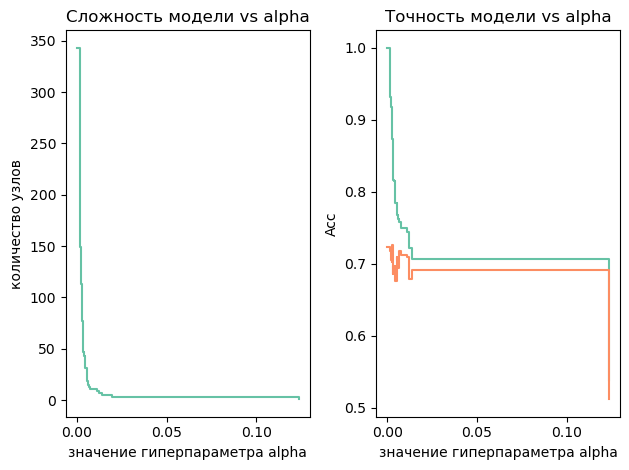

In [39]:
# изображаем на графике
fig, ax = plt.subplots(1, 2)
# график глубины дерева
ax[0].plot(ccp_alphas, node_counts, marker=',', drawstyle="steps-post")
ax[0].set_xlabel("значение гиперпараметра alpha")
ax[0].set_ylabel("количество узлов")
ax[0].set_title("Сложность модели vs alpha")
# график точности
ax[1].plot(ccp_alphas, train_scores, marker=',', label='train',
           drawstyle="steps-post")
ax[1].plot(ccp_alphas, test_scores, marker=',', label='test',
           drawstyle="steps-post")
ax[1].set_xlabel("значение гиперпараметра alpha")
ax[1].set_ylabel("Acc")
ax[1].set_title("Точность модели vs alpha")
fig.tight_layout()

Находим оптимальный размер дерева по максимуму на тестовой выборке.

In [40]:
# оптимальное количество узлов
opt_nodes_num = node_counts[test_scores.index(max(test_scores))]
# считаем точность с перекрёстной проверкой, показатель Acc
cv = cross_val_score(estimator=clfs[opt_nodes_num], X=X, y=y, cv=5,
 scoring='accuracy')
# записываем точность
score.append(np.around(np.mean(cv), 3))
score_models.append('pruned_tree')
print('Оптимальное количество узлов:', opt_nodes_num,
      '\nсоответствующая Acc на тестовой:', np.around(max(test_scores), 3),
      '\n\nAcc с перекрёстной проверкой',
      '\nдля модели', score_models[1], ':', score[1])

Оптимальное количество узлов: 97 
соответствующая Acc на тестовой: 0.726 

Acc с перекрёстной проверкой 
для модели pruned_tree : 0.73


Посмотрим на характеристики глубины и сложности построенного дерева с обрезкой ветвей

In [41]:
# выводим количество листьев (количество узлов)
clfs[opt_nodes_num].get_n_leaves()

22

In [42]:
# глубина дерева: количество узлов от корня до листа
# в самой длинной ветви
clfs[opt_nodes_num].get_depth()

8

## Визуализируем дерево

In [43]:
# находим деревья с количеством листьев меньше 20
[i for i in node_counts if i < 20]

[19, 19, 17, 15, 13, 11, 11, 11, 11, 11, 9, 7, 5, 3, 3, 3, 3, 1]

Количество узлов: 11 
Точность дерева на тестовой: 0.712


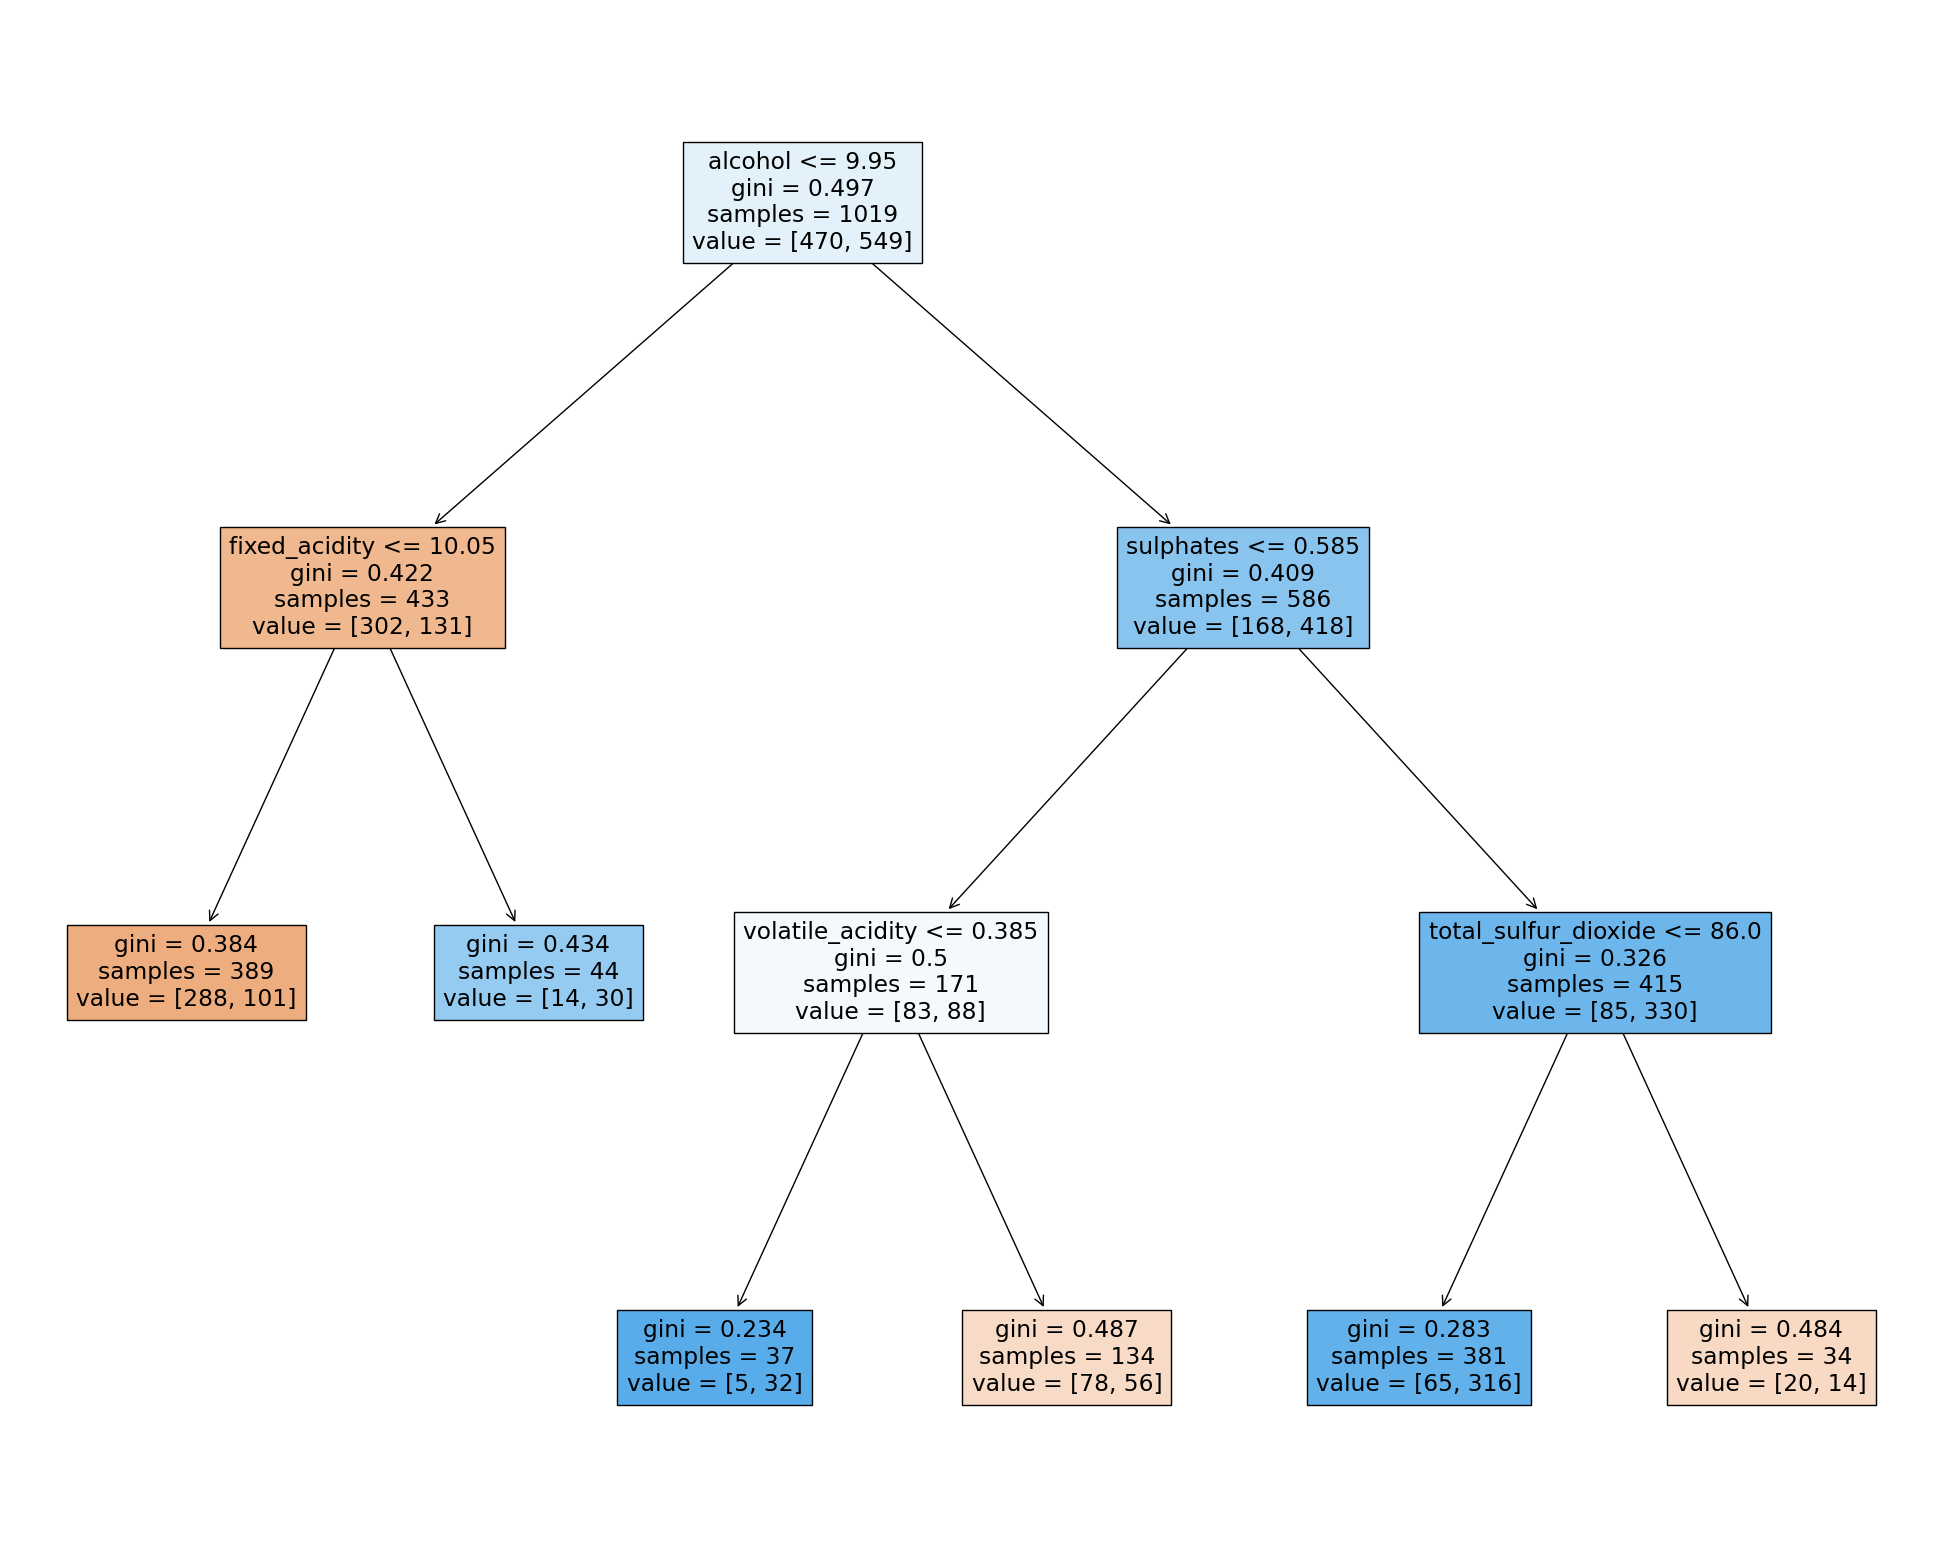

In [44]:
# визуализация на схеме
nodes_num = 11
print('Количество узлов:', nodes_num,
 '\nТочность дерева на тестовой:',
 np.around(test_scores[node_counts.index(nodes_num)], 3))
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clfs[node_counts.index(nodes_num)], filled=True,
 feature_names=X.columns)

In [45]:
# визуализируем дерево в виде текстовой схемы
viz = export_text(clfs[node_counts.index(nodes_num)],
 feature_names=list(X.columns))
print(viz)

|--- alcohol <= 9.95
|   |--- fixed_acidity <= 10.05
|   |   |--- class: 0
|   |--- fixed_acidity >  10.05
|   |   |--- class: 1
|--- alcohol >  9.95
|   |--- sulphates <= 0.58
|   |   |--- volatile_acidity <= 0.38
|   |   |   |--- class: 1
|   |   |--- volatile_acidity >  0.38
|   |   |   |--- class: 0
|   |--- sulphates >  0.58
|   |   |--- total_sulfur_dioxide <= 86.00
|   |   |   |--- class: 1
|   |   |--- total_sulfur_dioxide >  86.00
|   |   |   |--- class: 0



## Бэггинг

Модель бэггинга использует бутстреп, чтобы вырастить B деревьев на выборках с повторами
из обучающих данных. Построим модель дл B = 50я деревьев.

In [46]:
# параметр B: количество деревьев
num_trees = 50
# разбиения для перекрёстной проверки
kfold = KFold(n_splits=5, random_state=my_seed, shuffle=True)
# таймер
tic = time.perf_counter()
# модель с бэггингом
tree_bag = BaggingClassifier(base_estimator=cls_one_tree,
 n_estimators=num_trees,
 random_state=my_seed)
cv = cross_val_score(tree_bag, X, y, cv=kfold)
# таймер
toc = time.perf_counter()
print(f"Обучение модели с бэггингом на {num_trees:0.0f} деревьях",
 " и перекрёстной проверкой ",
 f"заняло {toc - tic:0.2f} секунд", sep='')


C:\Users\Mikhail\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Mikhail\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Mikhail\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Mikhail\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Mikhail\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Обучение модели с бэггингом на 50 деревьях и перекрёстной проверкой заняло 1.18 секунд


In [47]:
# точность
np.around(np.mean(cv), 3)

0.79

Итак, мы построили модель, выбрав параметр B случайным образом. Воспользуемся
функцией GridSearchCV() , чтобы перебрать 5 вариантов значений для параметраB .

In [48]:
# настроим параметры бэггинга с помощью сеточного поиска
param_grid = {'n_estimators' : [10, 20, 30, 40, 50]}
# таймер
tic = time.perf_counter()
clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),
 param_grid, scoring='accuracy', cv=kfold)
tree_bag = clf.fit(X, y)
# таймер
toc = time.perf_counter()
print(f"Сеточный поиск занял {toc - tic:0.2f} секунд", sep='')

Сеточный поиск занял 3.45 секунд


In [49]:
# точность лучшей модели
np.around(tree_bag.best_score_, 3)

0.798

In [50]:
# количество деревьев у лучшей модели
tree_bag.best_estimator_.get_params()['n_estimators']

40

Таким образом, перебрав несколько вариантов для B, мы немного улучшили первоначальную
точность модели бэггинга.

In [51]:

# записываем точность
score.append(np.around(tree_bag.best_score_, 3))
score_models.append('bagging_GS')
print('Acc с перекрёстной проверкой',
 '\nдля модели', score_models[2], ':', score[2])

Acc с перекрёстной проверкой 
для модели bagging_GS : 0.798


По итогу, наилучшей моделью является модель Бэггинга, с точностью, равной 0,798.

# Прогноз на отложенные наблюдения по лучшей моделии

In [52]:
# сводка по точности моделей
pd.DataFrame({'Модель' : score_models, 'Acc' : score})

,Модель,Acc
0,one_tree,0.731
1,pruned_tree,0.730
2,bagging_GS,0.798


Все модели показывают среднюю точность по показателю ACC, при этом самой точной
оказывается модельБэггингаа. Сделаем прогноз на отложенные наблюдения.

In [57]:
random_forest = clf.fit(X, y)
# данные для прогноза
X_pred = DF_predict.drop(['Y'], axis=1)
# строим прогноз
y_hat = random_forest.best_estimator_.predict(X_pred)
# характеристики точности
print(classification_report(DF_predict['Y'], y_hat))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       108
           1       0.83      0.84      0.83       132

    accuracy                           0.82       240
   macro avg       0.82      0.81      0.81       240
weighted avg       0.82      0.82      0.82       240



# Сравним точность моделей из упражнения 4

Модели в текущем задании показывают среднюю точность, находящуюся в промежутках от [0,79;0,84]. В отличии от моделей из упржанения 4, показывающих точность ACC, равную 1. Это говорит о том, что модели из упражнения 4 являются более точными